In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Boston.csv')

In [3]:
df.shape

(506, 15)

In [4]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df=df.drop('Unnamed: 0', axis=1)

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

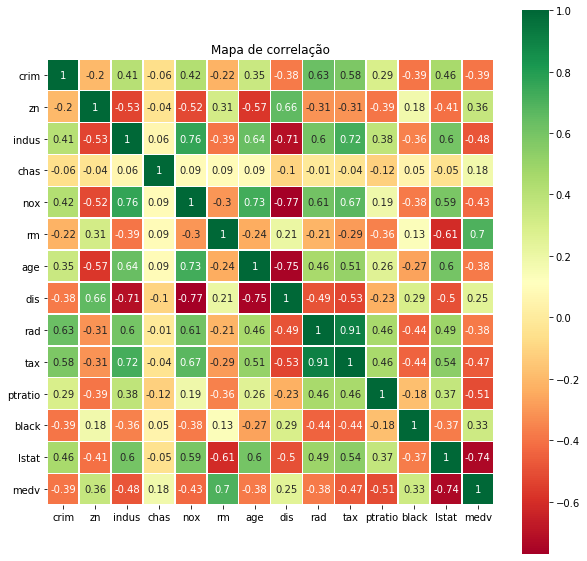

In [7]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True, square=True, cmap='RdYlGn', linewidths=.5);
plt.title('Mapa de correlação');

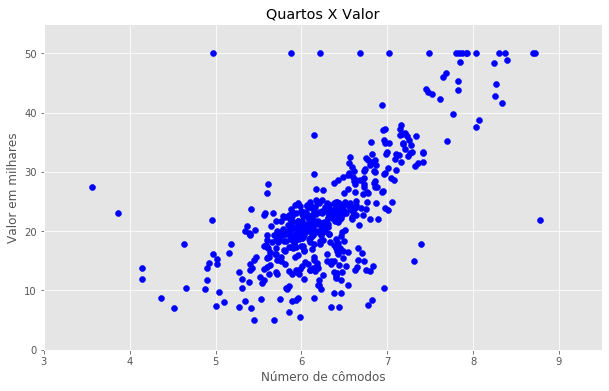

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(df['rm'],df['medv'], color='blue');
plt.title('Quartos X Valor');
plt.xlabel('Número de cômodos');
plt.axis([3,9.5,0,55]);
plt.ylabel('Valor em milhares');

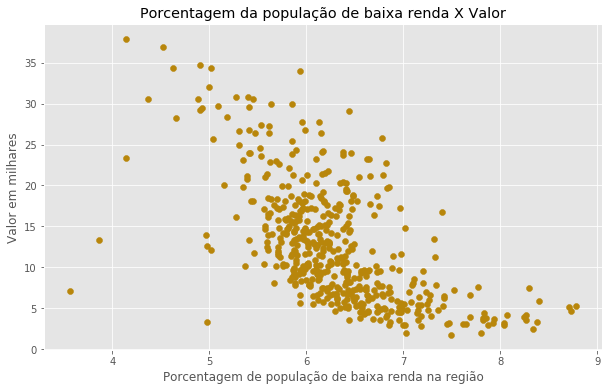

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['rm'],df['lstat'], color='darkgoldenrod');
plt.title('Porcentagem da população de baixa renda X Valor');
plt.xlabel('Porcentagem de população de baixa renda na região');
plt.ylabel('Valor em milhares');

In [10]:
X=df[['rm','ptratio','lstat']].values
y=df['medv'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)

In [12]:
reg=LinearRegression()

In [13]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred=reg.predict(X_test)

In [15]:
print("R^2: {}".format(reg.score(X_test, y_test)))

R^2: 0.6915878280744172
